In [12]:
import meteostat
from meteostat import Point, Daily
import pandas as pd
from datetime import datetime


In [20]:
sudbury = Point(46.49, -80.99)

# for last 5 years
start = datetime(2019, 1, 1)
end = datetime(2023, 12, 31)


In [23]:
# Fetching daily weather data for Sudbury
weather_data = Daily(sudbury, start, end)
weather_data = weather_data.fetch()

# Converting to DataFrame for easy manipulation
df = pd.DataFrame(weather_data)

# Parsing the 'time' column explicitly to datetime
df['time'] = pd.to_datetime(df.index)

# Printing the first few rows of data to verify
print(df.head())


            tavg  tmin  tmax  prcp   snow   wdir  wspd  wpgt    pres  tsun  \
time                                                                         
2019-01-01 -15.4 -22.3  -8.5   6.4  370.0  345.0  18.9  54.0  1020.9   NaN   
2019-01-02 -19.3 -27.4 -11.2   0.4  370.0  152.0  11.1   NaN  1023.2   NaN   
2019-01-03  -6.1 -11.3  -0.8   4.0  390.0  214.0  13.8  46.0  1008.6   NaN   
2019-01-04  -0.5  -1.7   0.8   0.0  400.0  234.0  14.5  41.0  1003.7   NaN   
2019-01-05  -3.3  -5.8  -0.8   0.4  370.0    NaN   7.8   NaN  1006.1   NaN   

                 time  
time                   
2019-01-01 2019-01-01  
2019-01-02 2019-01-02  
2019-01-03 2019-01-03  
2019-01-04 2019-01-04  
2019-01-05 2019-01-05  


In [22]:
import meteostat
from meteostat import Point, Daily
import pandas as pd
from datetime import datetime

sudbury = Point(46.49, -80.99)

# Define the time period for last 5 years
start = datetime(2019, 1, 1)
end = datetime(2023, 12, 31)

weather_data = Daily(sudbury, start, end)
weather_data = weather_data.fetch()

df = pd.DataFrame(weather_data)
df['time'] = pd.to_datetime(df.index)

print(df.head())

df.to_csv('sudbury_weather_data.csv', index=False)


            tavg  tmin  tmax  prcp   snow   wdir  wspd  wpgt    pres  tsun  \
time                                                                         
2019-01-01 -15.4 -22.3  -8.5   6.4  370.0  345.0  18.9  54.0  1020.9   NaN   
2019-01-02 -19.3 -27.4 -11.2   0.4  370.0  152.0  11.1   NaN  1023.2   NaN   
2019-01-03  -6.1 -11.3  -0.8   4.0  390.0  214.0  13.8  46.0  1008.6   NaN   
2019-01-04  -0.5  -1.7   0.8   0.0  400.0  234.0  14.5  41.0  1003.7   NaN   
2019-01-05  -3.3  -5.8  -0.8   0.4  370.0    NaN   7.8   NaN  1006.1   NaN   

                 time  
time                   
2019-01-01 2019-01-01  
2019-01-02 2019-01-02  
2019-01-03 2019-01-03  
2019-01-04 2019-01-04  
2019-01-05 2019-01-05  


In [6]:
import os
print(os.getcwd())


C:\Users\Aanchal


In [14]:
import pandas as pd

# Load the CSV file
df = pd.read_csv('sudbury_weather_data.csv')

# Display the first few rows to get a sense of the data
print(df.head())
# Drop the 'tsun' column
df = df.drop(columns=['tsun'])
# Convert 'time' column to datetime format
df['time'] = pd.to_datetime(df['time'], format='%d-%m-%Y')
print(df.head())
# Check for missing values
print(df.isnull().sum())
# Fill missing values with column means
df = df.fillna(df.mean())
# Drop duplicate rows
df = df.drop_duplicates()
# Save the cleaned data to a new CSV file
df.to_csv('sudbury_weather_data_cleaned.csv', index=False)






   tavg  tmin  tmax  prcp   snow   wdir  wspd  wpgt    pres  tsun        time
0 -15.4 -22.3  -8.5   6.4  370.0  345.0  18.9  54.0  1020.9   NaN  01-01-2019
1 -19.3 -27.4 -11.2   0.4  370.0  152.0  11.1   NaN  1023.2   NaN  02-01-2019
2  -6.1 -11.3  -0.8   4.0  390.0  214.0  13.8  46.0  1008.6   NaN  03-01-2019
3  -0.5  -1.7   0.8   0.0  400.0  234.0  14.5  41.0  1003.7   NaN  04-01-2019
4  -3.3  -5.8  -0.8   0.4  370.0    NaN   7.8   NaN  1006.1   NaN  05-01-2019
   tavg  tmin  tmax  prcp   snow   wdir  wspd  wpgt    pres       time
0 -15.4 -22.3  -8.5   6.4  370.0  345.0  18.9  54.0  1020.9 2019-01-01
1 -19.3 -27.4 -11.2   0.4  370.0  152.0  11.1   NaN  1023.2 2019-01-02
2  -6.1 -11.3  -0.8   4.0  390.0  214.0  13.8  46.0  1008.6 2019-01-03
3  -0.5  -1.7   0.8   0.0  400.0  234.0  14.5  41.0  1003.7 2019-01-04
4  -3.3  -5.8  -0.8   0.4  370.0    NaN   7.8   NaN  1006.1 2019-01-05
tavg       0
tmin       0
tmax       0
prcp       0
snow    1221
wdir      18
wspd       1
wpgt     633
pr

In [15]:
# Generate descriptive statistics for each column
print(df.describe())


              tavg         tmin         tmax         prcp         snow  \
count  1826.000000  1826.000000  1826.000000  1826.000000  1826.000000   
mean      4.695181    -0.367579     9.740471     2.439266   265.785124   
min     -30.200000   -37.100000   -23.900000     0.000000     0.000000   
25%      -4.175000    -8.200000    -0.300000     0.000000   265.785124   
50%       5.100000     0.300000     9.750000     0.000000   265.785124   
75%      15.400000     9.600000    21.100000     2.200000   265.785124   
max      25.800000    20.600000    33.500000    40.500000  1020.000000   
std      11.966545    11.790213    12.522126     5.231854   131.635762   

              wdir         wspd         wpgt         pres                 time  
count  1826.000000  1826.000000  1826.000000  1826.000000                 1826  
mean    187.148230    15.473315    45.036044  1015.835585  2021-07-01 12:00:00  
min       0.000000     4.100000    31.000000   982.800000  2019-01-01 00:00:00  
25%      

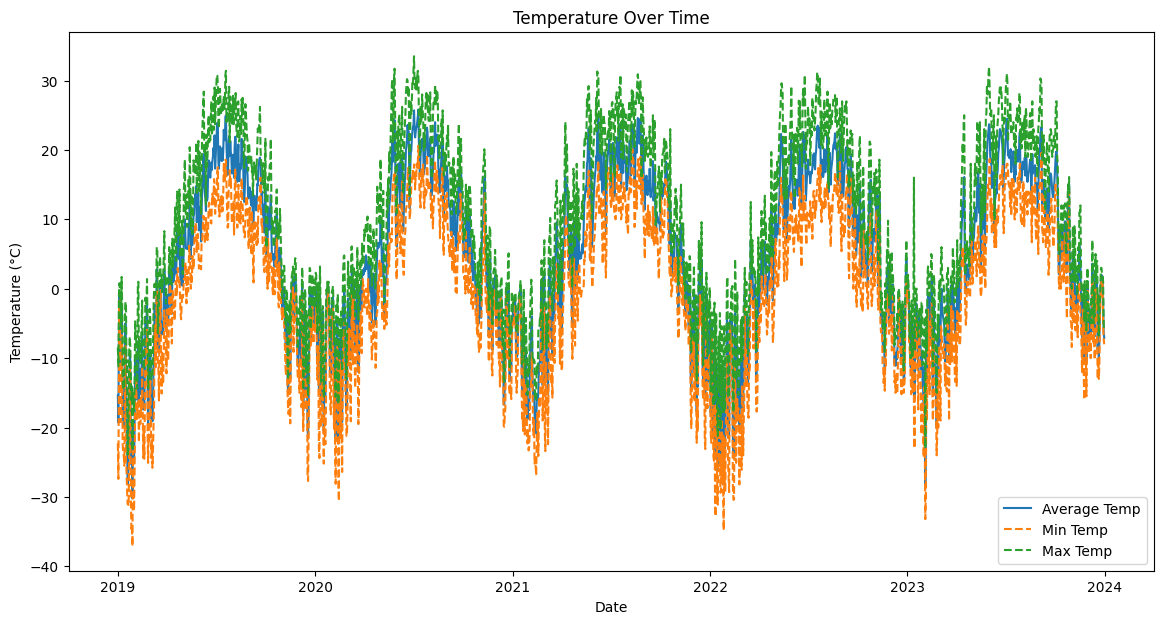

In [16]:
import matplotlib.pyplot as plt

# Plot average, min, and max temperatures over time
plt.figure(figsize=(14, 7))
plt.plot(df['time'], df['tavg'], label='Average Temp')
plt.plot(df['time'], df['tmin'], label='Min Temp', linestyle='--')
plt.plot(df['time'], df['tmax'], label='Max Temp', linestyle='--'
plt.ylabel('Temperature (°C)')
plt.title('Temperature Over Time')
plt.legend()
plt.show()


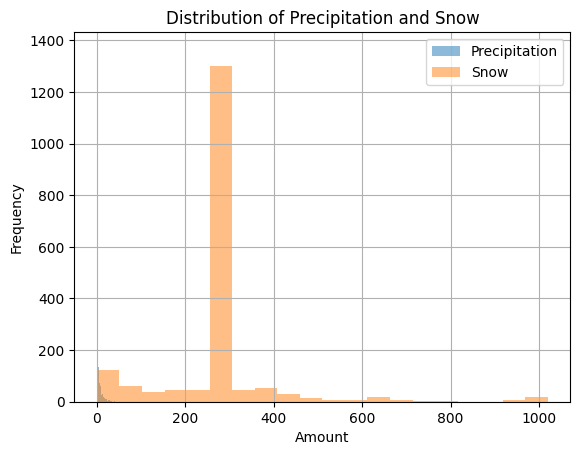

In [17]:
# Histogram for precipitation and snow
df['prcp'].hist(bins=20, alpha=0.5, label='Precipitation')
df['snow'].hist(bins=20, alpha=0.5, label='Snow')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.title('Distribution of Precipitation and Snow')
plt.legend()
plt.show()


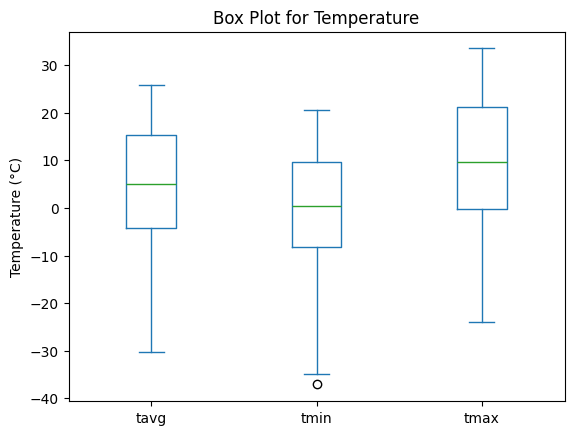

In [18]:
# Box plot for temperature columns
df[['tavg', 'tmin', 'tmax']].plot(kind='box')
plt.title('Box Plot for Temperature')
plt.ylabel('Temperature (°C)')
plt.show()


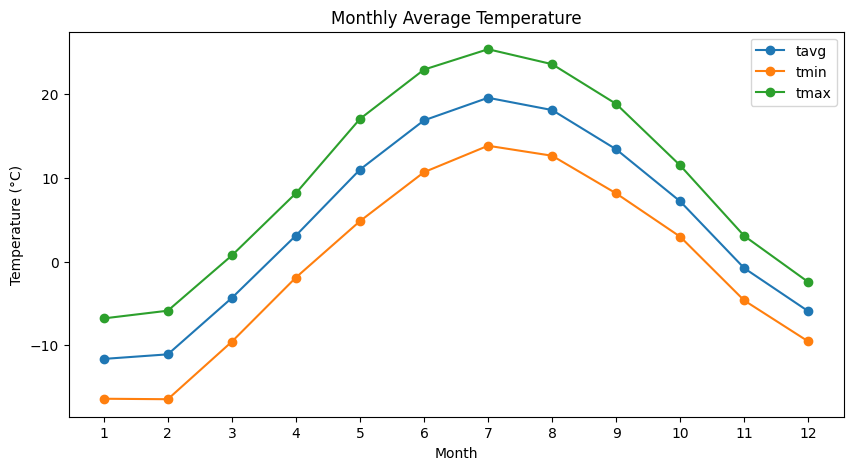

In [19]:
# Extract month from the date
df['month'] = df['time'].dt.month

# Calculate monthly averages
monthly_avg = df.groupby('month')[['tavg', 'tmin', 'tmax', 'prcp']].mean()

# Plot monthly averages for temperature
monthly_avg[['tavg', 'tmin', 'tmax']].plot(kind='line', marker='o', figsize=(10, 5))
plt.title('Monthly Average Temperature')
plt.xlabel('Month')
plt.ylabel('Temperature (°C)')
plt.xticks(range(1, 13))
plt.show()


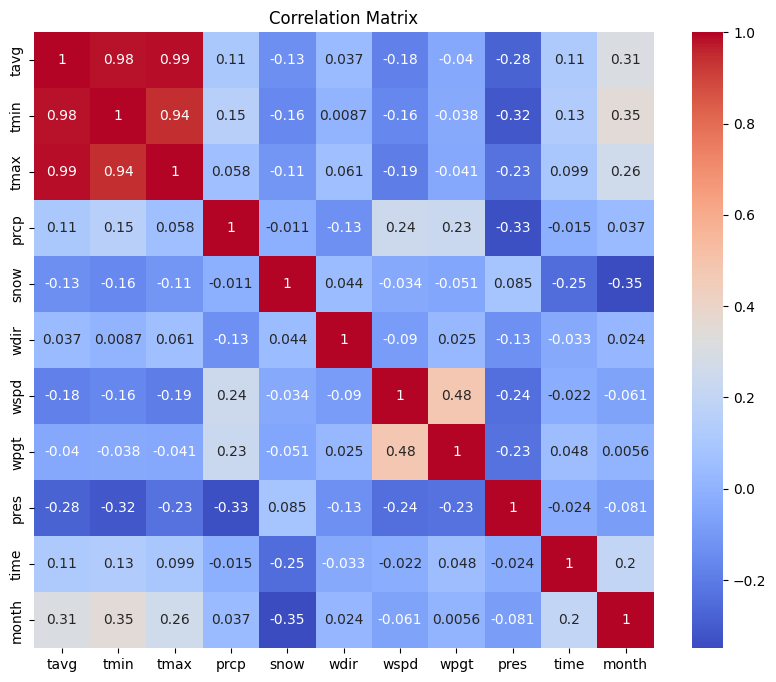

In [20]:
# Compute the correlation matrix
correlation_matrix = df.corr()

# Plot a heatmap of the correlation matrix
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()
